In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from scipy import sparse

### Settings

In [56]:
def func(xx):
    return 1/(1+xx**2)

In [57]:
def Lagrange(xx,yy,x):
    n = len(xx)
    y = 0
    for i in range(n):
        L = 1
        for j in range(n):
            if i == j:
                continue
            else:
                L *= (x-xx[j])/(xx[i]-xx[j])
        y += yy[i]*L
    return y

In [58]:
def Cubic_Spline(xx,yy): 
    n = len(xx)-1
    y = 0
    H = np.zeros([n+1,n+1])
    u = np.zeros([n+1,1])

    u[0][0] = 0
    u[n][0] = 0
    H[0][0] = 1
    H[n][n] = 1
    for k in range(1,n):
        hk_1 = xx[k]-xx[k-1]
        hk = xx[k+1]-xx[k]
        dk = (yy[k+1]-yy[k])/hk
        dk1 = (yy[k]-yy[k-1])/hk_1
        u[k][0] = 6*(dk-dk1)
        H[k][k-1] = hk_1
        H[k][k+1] = hk      
        H[k][k] = 2*(hk_1 + hk)

    m = np.matmul(np.linalg.inv(H),u)

    S = np.zeros([n,4])
    for k in range(n):
        hk = xx[k+1]-xx[k]
        dk = (yy[k+1]-yy[k])/hk

        S[k][0] = yy[k]
        S[k][1] = dk - hk*(2*m[k]+m[k+1])/6
        S[k][2] = m[k]/2
        S[k][3] = (m[k+1]-m[k])/6/hk

    return S

In [59]:
def return_cubic(ax,xx,yy,S,x):
    n = len(xx)-1
    for k in range(n):
        xxx = np.linspace(xx[k],xx[k+1],20)
        y = S[k][0] + S[k][1]*(x-xx[k]) + S[k][2]*(x-xx[k])**2 + S[k][3]*(x-xx[k])**3 
        yyy = np.zeros(np.size(xxx))
        for i in range(len(xxx)):
            yyy[i] = y.subs(x,xxx[i])
        if k == n-1:
            ax.plot(xxx,yyy,'r--',label='Cubic Spline')
        ax.plot(xxx,yyy,'r--')

In [60]:
ns = [3,4,5,6,7,8,9,10]

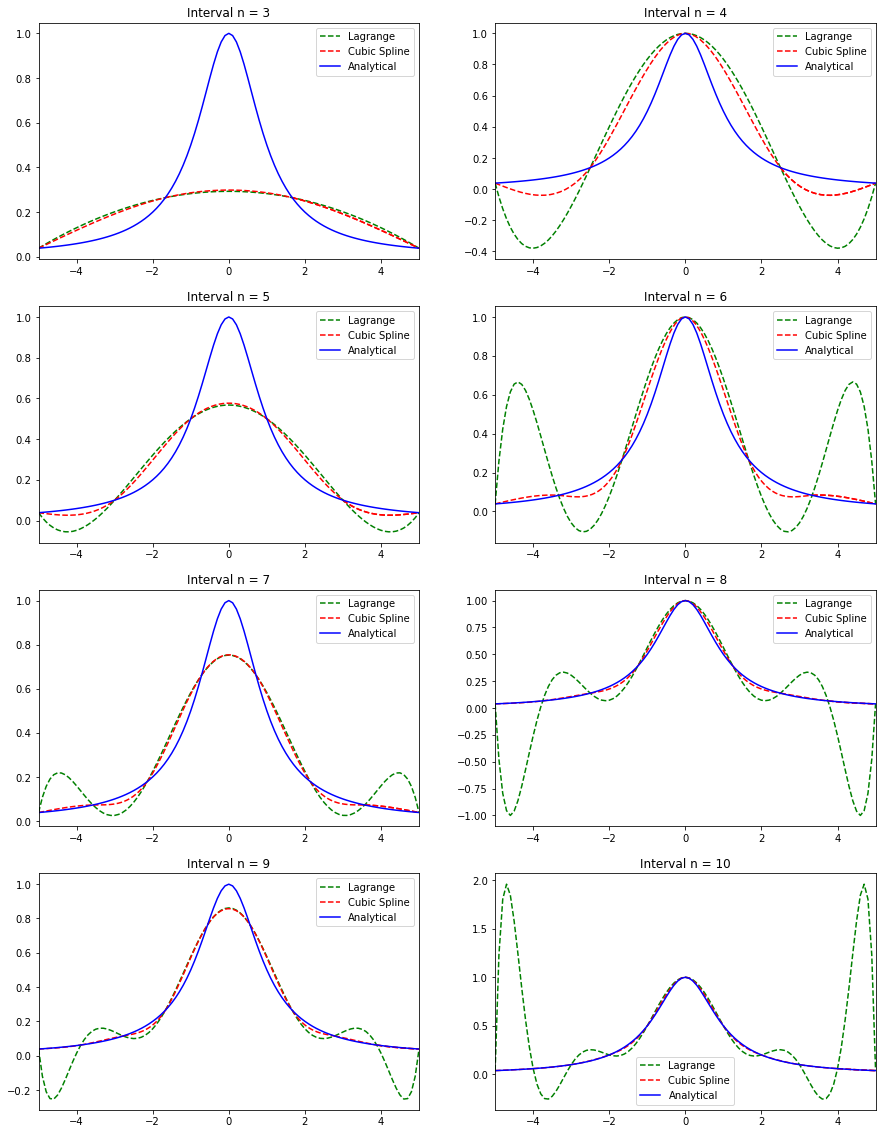

In [61]:
fig,ax = plt.subplots(4,2,figsize=(15,20))
for j in range(len(ns)):
    n = ns[j]
    # parameters
    h = 10/n
    xx = np.arange(-5,5+h,h)
    yy = func(xx)
    x = symbols('x')

    # interpolation
    f1 = Lagrange(xx,yy,x)
    S = Cubic_Spline(xx,yy)

    # plot
    xxx = np.linspace(-5,5,101)
    yyy = np.zeros(np.size(xxx))
    for i in range(len(xxx)):
        yyy[i] = f1.subs(x,xxx[i])
    ax[int(np.floor(j/2))][j%2].plot(xxx,yyy,'g--',label = 'Lagrange')
    return_cubic(ax[int(np.floor(j/2))][j%2],xx,yy,S,x)
    ax[int(np.floor(j/2))][j%2].plot(xxx,func(xxx),'b-',label = 'Analytical')
    ax[int(np.floor(j/2))][j%2].set_xlim([-5,5])
    ax[int(np.floor(j/2))][j%2].legend()
    ax[int(np.floor(j/2))][j%2].set_title('Interval n = '+str(n))
plt.savefig('compare.png')